<a href="https://colab.research.google.com/github/daria-nishchenko/B4U_Workshops/blob/main/Nishchenko_B4U_Workshop1_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Hands-on Assignment: Hypothesis Testing**

# **Фінальне практичне завдання: Тестування гіпотез**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import pylab

##**Introduction**
Here you will gain experience applying hypothesis tests to uncover statistical significance.

The data you will be using a dataset published by The National Heart, Lung and Blood Institute (NHLBI) from a clinical trial known as the Digitalis Investigation Group (DIG) Trial. This data contains baseline and outcome information for chronic heart failure patients from the DIG Trial cohort who received either the drug Digoxin or a placebo. Here, outcomes have been recorded under two main categories, cardiovasular mortality and hospitalization.


##**Вступ**

У даному завданні ви отримаєте досвід застосування тестування гіпотез для виявлення статистичного значення.



Дані, які ви використовуватимете - набір даних, опублікований Національним інститутом серця, легенів і крові (NHLBI) із клінічного випробування, відомого як Дослідна група Digitalis (DIG). Ці дані містять вихідну інформацію та інформацію про результати для пацієнтів із хронічною серцевою недостатністю з когорти дослідження DIG, які отримували препарат дигоксин або плацебо. Тут результати були записано за двома основними категоріями: смертність від серцево-судинних захворювань і госпіталізація.

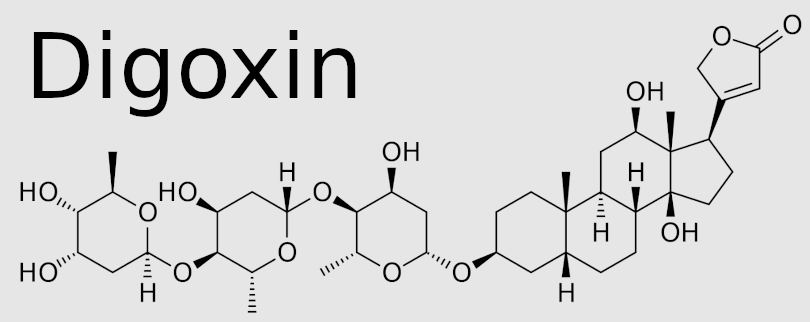

For more information, you may refer to a comprehensive description of this dataset here:

https://biolincc.nhlbi.nih.gov/media/teachingstudies/digdoc.pdf?link_time=2022-09-20_07:24:09.208947

Для отримання додаткової інформації ви можете звернутися до повного опису цього набору даних тут:



https://biolincc.nhlbi.nih.gov/media/teachingstudies/digdoc.pdf?link_time=2022-09-20_07:24:09.208947

##**Instructions**

##**Інструкції**

In your own Colab notebook, use the concepts presented in the previous sections to perform the hypothesis tests indicated below. You will be graded based on correct execution and interpretation of your hypothesis tests.

---

У власному блокноті Colab використовуйте концепції, представлені в попередніх розділах, щоб виконати тестування гіпотез, зазначених нижче. Вам буде виставлено оцінку на основі правильного виконання та інтерпретації ваших тестувань.

##**Steps**

##**Кроки**

Using the DIG dataset, perform the following hypothesis tests on variables of your choosing. They must be different from the examples in the previous section.

You must state your null and alternative hypotheses, run the hypothesis test, and provide an interpretation of your results. When necessary, you may make up necessary population parameters (ex. mean and standard deviation).

---

Використовуючи набір даних DIG, виконайте наведені нижче тесування гіпотез щодо змінних за вашим вибором. Вони мають відрізнятися від прикладів у попередньому розділі.

Ви повинні сформулювати свою нульову та альтернативну гіпотези, виконати тестування гіпотези та надати інтерпретацію своїх результатів. Якщо необхідно, ви можете створити необхідні параметри сукупності (наприклад, середнє значення та стандартне відхилення).

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP')
df.head()

,AGE,RACE,SEX,EJF_PER,CREAT,KLEVEL,CHFDUR,CHFETIOL,PREVMI,DIABETES,HYPERTEN,DIGDOSE,CVD,WHF,DIG,HOSP,NHOSP,DEATH,REASON,DIABETES_AND_HYPERTEN
0,77,1,1,12,1.500,3.1,2.0,4.0,1.0,0,1.0,0.25,1,1,0,1,4,1,1.0,0
1,72,1,2,36,1.239,5.1,12.0,1.0,0.0,0,1.0,0.25,1,1,0,1,2,0,Not given,0
2,74,1,1,15,1.466,4.0,288.0,4.0,0.0,0,0.0,0.375,1,1,0,1,5,0,Not given,0
3,69,2,2,45,1.200,4.3,84.0,4.0,1.0,0,0.0,0.25,1,0,0,1,5,0,Not given,0
4,64,1,2,30,1.300,4.3,31.0,1.0,1.0,0,0.0,0.25,0,0,0,0,0,1,2.0,0


### **One-sample Z-Test**

**Одновибірковий Z-тест**

<font color='red'> Hypotheses.

Null Hypothesis (H0): The population mean serum creatinine level is equal to the specified value of 1.28.

Alternative Hypothesis (Ha): The population mean serum creatinine level is not equal to the specified value of 1.28.

---
<font color='red'>  Гіпотези.

Нульова гіпотеза (H0): середній популяційний рівень креатиніну в сироватці крові дорівнює вказаному значенню 1,28.

Альтернативна гіпотеза (Ha): середній популяційний рівень креатиніну в сироватці крові не дорівнює зазначеному значенню 1,28.

In [ ]:
def oneSampleZTestForMeans(sample, popMean, popStdDev):

  sampleMean = np.mean(sample)
  sampleSize = len(sample)

  # Calculate the z-score.
  stdDevOfSamplingDistribution = popStdDev/np.sqrt(sampleSize)
  zScore = (sampleMean - popMean)/ stdDevOfSamplingDistribution

  # Calculate the p-values.
  oneSidedPValue = stats.norm.sf(abs(zScore))
  twoSidedPValue = oneSidedPValue*2

  results = ( f'z-score = {zScore}\n'
              f'one-sided p-value = {oneSidedPValue}\n'
              f'two-sided p-value = {twoSidedPValue}'
            )

  print(results)

populationMean = 1.28
populationStdDev = 0.37
oneSampleZTestForMeans(df['CREAT'], populationMean, populationStdDev)

z-score = 1.334708427254847
one-sided p-value = 0.0909858971630671
two-sided p-value = 0.1819717943261342


<font color='red'> Interpretation.

Since the two-sided p-value (0.1819717943261342) is greater than the significance level (alpha) of 0.05, we fail to reject the null hypothesis. Therefore, there is not enough evidence to conclude that the population mean serum creatinine level is significantly different from the specified value of 1.28. The z-score of 1.334708427254847 indicates how many standard deviations the sample mean is away from the specified value.

In summary, based on the results of the one-sample Z-test, there is no significant evidence to suggest a difference between the population mean serum creatinine level and the specified value of 1.28.

---
<font color='red'> Інтерпретація.

Оскільки двостороннє p-значення (0,1819717943261342) перевищує рівень значущості (альфа) 0,05, ми не можемо відхилити нульову гіпотезу. Таким чином, недостатньо доказів, щоб зробити висновок, що середній популяційний рівень креатиніну в сироватці крові значно відрізняється від зазначеного значення 1,28. Z-показник 1,334708427254847 вказує на те, на скільки стандартних відхилень середнє значення зразка відрізняється від зазначеного значення.

Підсумовуючи, на основі результатів Z-тесту для одного зразка немає суттєвих доказів, які б свідчили про різницю між популяційним середнім рівнем креатиніну в сироватці крові та вказаним значенням 1,28.

### **One-sample T-Test**

**Одновибірковий Т-тест**

<font color='red'> Hypotheses.

Null Hypothesis (H0): The population mean duration of chronic heart failure is equal to the specified value (mu), which is 29.8 in this case.

Alternative Hypothesis (Ha): The population mean duration of chronic heart failure is not equal to the specified value (mu).

---
<font color='red'>  Гіпотези.

Нульова гіпотеза (H0): Середня популяційна тривалість хронічної серцевої недостатності дорівнює вказаному значенню (мю), яке в даному випадку становить 29,8.

Альтернативна гіпотеза (Ha): Середня популяційна тривалість хронічної серцевої недостатності не дорівнює вказаному значенню (мю).

In [ ]:
populationMean = 29.8  # Hypothetical value

sampleMean = np.mean(df['CHFDUR'])
sampleSize = len(df['CHFDUR'])

t_statistic, p_value = stats.ttest_1samp(df['CHFDUR'], populationMean)

results = (f't-statistic = {t_statistic}\n'
           f'p-value = {p_value}')

print(results)

t-statistic = 1.1319580555041646
p-value = 0.25769742672799795


<font color='red'> Interpretation.

The t-statistic value obtained is 1.1319580555041646, and the corresponding p-value is 0.25769742672799795.

Since the p-value (0.25769742672799795) is greater than the significance level (assuming α = 0.05), we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that the population mean duration of chronic heart failure is different from the specified value of 29.8 months.

---
<font color='red'> Інтерпретація.

Отримано значення t-статистики становить 1,1319580555041646, а відповідне значення p — 0,25769742672799795.

Оскільки p-значення (0,25769742672799795) більше за рівень значущості (за умови, що α = 0,05), ми не можемо відхилити нульову гіпотезу. Це означає, що недостатньо доказів, щоб зробити висновок про те, що середня популяційна тривалість хронічної серцевої недостатності відрізняється від зазначеного значення 29,8 місяців.

### **Standard Independent T-test (2-samples)**

**Стандартний незалежний Т-тест (2 зразки)**

<font color='red'> Hypotheses.

*   Levene's Test:

Null Hypothesis (H0): The variances of hospitalizations are equal between the two groups (CVD = 0 and CVD = 1).

Alternative Hypothesis (Ha): The variances of hospitalizations are not equal between the two groups.

*   Independent t-Test:

Null Hypothesis (H0): The mean number of hospitalizations is equal between the two groups (CVD = 0 and CVD = 1).

Alternative Hypothesis (Ha): The mean number of hospitalizations is greater in the group with cardiovascular disease (CVD = 1) compared to the group without cardiovascular disease (CVD = 0).

---
<font color='red'>  Гіпотези.

*   Тест Левена:

Нульова гіпотеза (H0): дисперсії госпіталізацій однакові між двома групами (CVD = 0 і CVD = 1).

Альтернативна гіпотеза (Ha): дисперсії госпіталізацій не однакові між двома групами.

*   Незалежний t-тест:

Нульова гіпотеза (H0): Середня кількість госпіталізацій однакова для двох груп (CVD = 0 і CVD = 1).

Альтернативна гіпотеза (Ha): середня кількість госпіталізацій більша в групі із серцево-судинними захворюваннями (CVD = 1) порівняно з групою без серцево-судинних захворювань (CVD = 0).

Levene's Test:
Statistic: 0.8836363636363637
P-value: 0.3834930518052086
Standard Independent T-test:
Statistic: 2.272727272727273
P-value: 0.03171488255320257


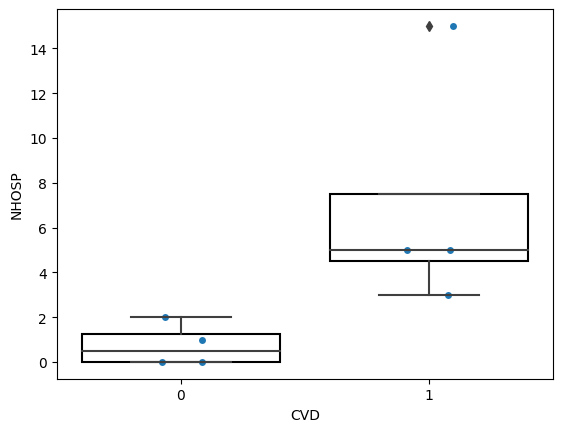

In [ ]:
# Plot a box plot to explore potentially significant differences.
overEightyEight = df.loc[df['AGE'] >= 90]
sns.boxplot(data = overEightyEight, x='CVD', y='NHOSP',
            boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data = overEightyEight, x='CVD', y='NHOSP', zorder=0)

# Perform Levene's test for equality of variances
worsening = overEightyEight.loc[overEightyEight['CVD'] == 1]
notWorsening = overEightyEight.loc[overEightyEight['CVD'] == 0]
stats_levene = stats.levene(worsening['NHOSP'], notWorsening['NHOSP'])
print("Levene's Test:")
print(f"Statistic: {stats_levene.statistic}")
print(f"P-value: {stats_levene.pvalue}")

# Perform standard independent t-test
t_test = stats.ttest_ind(worsening['NHOSP'].dropna(), notWorsening['NHOSP'].dropna(), alternative = 'greater', equal_var=True)
print("Standard Independent T-test:")
print(f"Statistic: {t_test.statistic}")
print(f"P-value: {t_test.pvalue}")


<font color='red'> Interpretation.

*   Levene's Test:

The p-value of 0.3834 is greater than the significance level (e.g., α = 0.05), so we fail to reject the null hypothesis. This suggests that there is no strong evidence to conclude that the variances of hospitalizations differ significantly between the two groups.

*   Independent t-Test:

The p-value of 0.0317 is less than the significance level (e.g., α = 0.05), so we reject the null hypothesis. This provides evidence to suggest that there is a significant difference in the mean number of hospitalizations between the two groups. Additionally, the positive t-statistic value of 2.2727 indicates that the mean number of hospitalizations is higher in the group with cardiovascular disease (CVD = 1) compared to the group without cardiovascular disease (CVD = 0).

---
<font color='red'> Інтерпретація.

*   Тест Левена:

p-значення 0.3834 більше за рівень значущості (наприклад, α = 0,05), тому ми не можемо відхилити нульову гіпотезу. Це свідчить про те, що немає вагомих доказів для висновку про суттєву різницю між госпіталізацією між двома групами.

*   Незалежний t-тест:

p-значення 0.0317 є меншим за рівень значущості (наприклад, α = 0,05), тому ми відхиляємо нульову гіпотезу. Це свідчить про те, що існує значна різниця в середній кількості госпіталізацій між двома групами. Крім того, позитивне t-статистичне значення 2.2727 вказує на те, що середня кількість госпіталізацій вища в групі з серцево-судинними захворюваннями (CVD = 1) порівняно з групою без серцево-судинних захворювань (CVD = 0).

### **Welch's T-test (2-samples)**

**Т-критерій Велча (2 зразки)**

<font color='red'> Hypotheses.

*   Levene's Test:

In this case, the null hypothesis (H0) is that the variances of hospitalizations are equal between the two groups.

The alternative hypothesis (Ha) is that the variances are not equal.

*   Welch's T-test:

The null hypothesis (H0) for Welch's t-test is that the mean number of hospitalizations is equal between the two groups.

The alternative hypothesis (Ha) is that the mean of group 1 (CVD = 1) is greater than the mean of group 2 (CVD = 0).

---
<font color='red'>  Гіпотези.

*   Тест Левена:

У цьому випадку нульова гіпотеза (H0) полягає в тому, що дисперсії госпіталізацій рівні між двома групами.

Альтернативна гіпотеза (Ha) полягає в тому, що дисперсії не рівні.

*   T-критерій Велча:

Нульова гіпотеза (H0) для t-критерію Уелча полягає в тому, що середня кількість госпіталізацій однакова для двох груп.

Альтернативна гіпотеза (Ha) полягає в тому, що середнє значення групи 1 (CVD = 1) більше, ніж середнє значення групи 2 (CVD = 0).

Levene's Test:
Statistic: 803.7028147958895
P-value: 5.2723741057420743e-166

Welch's T-test:
Statistic: 52.612399829905556
P-value: 0.0


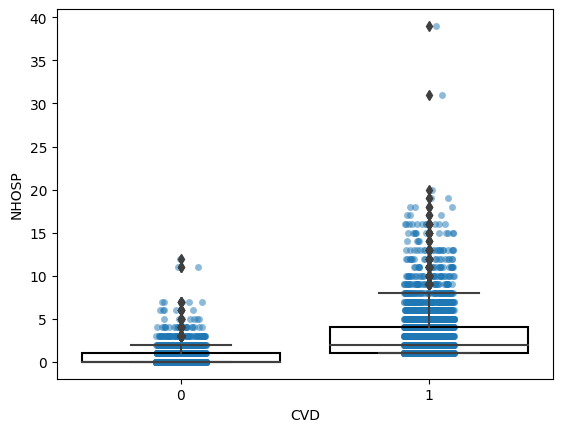

In [ ]:
# Plot a box plot to explore potentially significant differences.
sns.boxplot(data=df, x='CVD', y='NHOSP', boxprops={'edgecolor': 'black', 'facecolor': (1, 1, 1, 0)}, zorder=5)
sns.stripplot(data=df, x='CVD', y='NHOSP', alpha=.5, zorder=0)

group1 = df.loc[df['CVD'] == 1]
group2 = df.loc[df['CVD'] == 0]

# Perform Levene's test for equality of variances
levene_test = stats.levene(group1['NHOSP'], group2['NHOSP'])
print("Levene's Test:")
print(f"Statistic: {levene_test.statistic}")
print(f"P-value: {levene_test.pvalue}\n")

# Perform Welch's t-test
t_test = stats.ttest_ind(group1['NHOSP'].dropna(), group2['NHOSP'].dropna(), alternative='greater', equal_var=False)
print("Welch's T-test:")
print(f"Statistic: {t_test.statistic}")
print(f"P-value: {t_test.pvalue}")

<font color='red'> Interpretation.

*   Levene's Test:

Since the p-value is extremely small (close to zero), we can reject the null hypothesis and conclude that there is evidence to suggest that the variances of hospitalizations are not equal between the two groups.

*   Welch's T-test:

Since the p-value is very close to zero, we can reject the null hypothesis and conclude that there is strong evidence to suggest that the mean number of hospitalizations for individuals with cardiovascular disease (group 1) is significantly greater than the mean number of hospitalizations for individuals without cardiovascular disease (group 2).

---
<font color='red'> Інтерпретація.

*   Тест Левена:

Оскільки p-значення надзвичайно мале (близьке до нуля), ми можемо відхилити нульову гіпотезу та зробити висновок, що є докази того, що дисперсії госпіталізацій не однакові між двома групами.

*   T-критерій Велча:

Оскільки p-значення дуже близьке до нуля, ми можемо відхилити нульову гіпотезу та зробити висновок, що є вагомі докази того, що середня кількість госпіталізацій для осіб із серцево-судинними захворюваннями (група 1) значно перевищує середню кількість госпіталізацій для осіб без серцево-судинних захворювань (2 група).

---
###Finally propose an example of paired data and create a Pandas DataFrame for it.

Then, perform a *Paired T-test*. You must state your null and alternative hypotheses, run the hypothesis test, and provide an interpretation of your results. Here's an example of paired data related to a weight loss study:

**Нарешті**, запропонуйте приклад парних даних і створіть для нього Pandas DataFrame. Потім виконайте *парний Т-тес*т. Ви повинні сформулювати свою нульову та альтернативну гіпотези, запустити перевірку гіпотези та надати інтерпретацію своїх результатів.

Ось приклад парних даних, пов’язаних із дослідженням втрати ваги:

In [ ]:
data = {'ID': [1, 2, 3, 4, 5],
        'Before Weight (kg)': [75, 68, 82, 71, 90],
        'After Weight (kg)': [70, 66, 78, 68, 85]}

df = pd.DataFrame(data)
df

,ID,Before Weight (kg),After Weight (kg)
0,1,75,70
1,2,68,66
2,3,82,78
3,4,71,68
4,5,90,85


<font color='red'> Hypotheses.

H0: The mean difference between the "Before Weight (kg)" and "After Weight (kg)" is zero.

Ha: The mean difference between the "Before Weight (kg)" and "After Weight (kg)" is not zero.

---
<font color='red'>  Гіпотези.

H0: Середня різниця між «Вагою до (кг)» і «Вагою після (кг)» дорівнює нулю.

Ha: Середня різниця між «Вагою до (кг)» і «Вагою після (кг)» не дорівнює нулю.

In [ ]:
stats.ttest_rel(df['After Weight (kg)'],df['Before Weight (kg)'])

TtestResult(statistic=-6.516946235415336, pvalue=0.002862214865913692, df=4)

<font color='red'> Interpretation.

Since the p-value (0.002862214865913692) is less than the typical significance level of 0.05, we have enough evidence to reject the null hypothesis. This indicates that there is a significant difference between the mean weights before and after the intervention.

The negative t-statistic (-6.516946235415336) suggests that the "After Weight (kg)" values tend to be lower than the "Before Weight (kg)" values on average.

Therefore, based on the paired t-test, we can conclude that there is a statistically significant difference in weight before and after the intervention, with the average weight decreasing after the intervention.

---
<font color='red'> Інтерпретація.

Оскільки p-значення (0,002862214865913692) менше типового рівня значущості 0,05, ми маємо достатньо доказів, щоб відхилити нульову гіпотезу. Це вказує на те, що існує значна різниця між середніми вагами до та після втручання.

Негативна t-статистика (-6,516946235415336) свідчить про те, що значення «Після ваги (кг)» мають тенденцію бути нижчими за середні значення «Вага до (кг)».

Таким чином, на основі парного t-критерію ми можемо зробити висновок, що існує статистично значуща різниця у вазі до та після втручання, при цьому середня вага зменшується після втручання.

##**Rubric (10 points)**

##**Рубрика (10 балів)**

**0.5 points per hypothesis test**

The null and alternative hypotheses were stated. For the paired t-test, the data must be paired.

<font color='blue'>Grader comments: None</font>

---

**1 points per hypothesis test**

The hypothesis test was correctly run.

<font color='blue'>Grader comments: None</font>


---
**0.5 point per hypothesis test**

The correct interpretation was provided. For the paired t-test, the data must be paired.

<font color='blue'>Grader comments: None</font>


**0,5 бала за перевірку гіпотези**



Висловлено нульову та альтернативну гіпотези. Для парного t-критерію дані мають бути парними.



<font color='blue'>Коментарі грейдерів: немає</font>



---



**1 бал за перевірку гіпотези**



Перевірку гіпотези виконано правильно.



<font color='blue'>Коментарі грейдерів: немає</font>





---

**0,5 бала за перевірку гіпотези**



Надано правильне тлумачення. Для парного t-критерію дані мають бути парними.



<font color='blue'>Коментарі грейдерів: немає</font>